In [12]:
import pandas as pd

# Load the data (replace 'your_data.csv' with the actual file name)
df = pd.read_csv('Air_Quality_20240731.csv')

# Display unique values in the 'Name' column
unique_names = df['Name'].unique()

# Print the unique values
print(unique_names)


['Boiler Emissions- Total SO2 Emissions' 'Fine particles (PM 2.5)'
 'Nitrogen dioxide (NO2)'
 'Asthma emergency department visits due to PM2.5'
 'Annual vehicle miles traveled'
 'Respiratory hospitalizations due to PM2.5 (age 20+)' 'Ozone (O3)'
 'Asthma hospitalizations due to Ozone'
 'Boiler Emissions- Total NOx Emissions'
 'Boiler Emissions- Total PM2.5 Emissions'
 'Outdoor Air Toxics - Formaldehyde'
 'Asthma emergency departments visits due to Ozone'
 'Cardiovascular hospitalizations due to PM2.5 (age 40+)'
 'Cardiac and respiratory deaths due to Ozone' 'Deaths due to PM2.5'
 'Outdoor Air Toxics - Benzene' 'Annual vehicle miles traveled (trucks)'
 'Annual vehicle miles traveled (cars)']


In [13]:
# Count the number of unique values
num_unique_names = df['Name'].nunique()
print(f"Number of unique values in 'Name' column: {num_unique_names}")

Number of unique values in 'Name' column: 18


##  How do Boiler Emissions of Total SO2, NOx, and PM2.5 vary across different seasons?

In [14]:
# Filter the data for Boiler Emissions
boiler_emissions = df[df['Name'].isin([
    'Boiler Emissions- Total SO2 Emissions', 
    'Boiler Emissions- Total NOx Emissions', 
    'Boiler Emissions- Total PM2.5 Emissions'
])]

# Display the first few rows of the filtered data
boiler_emissions.head()
# Convert 'Start_Date' to datetime
boiler_emissions['Start_Date'] = pd.to_datetime(boiler_emissions['Start_Date'])

# Extract the month and define the season
boiler_emissions['Month'] = boiler_emissions['Start_Date'].dt.month

# Define the season based on the month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

boiler_emissions['Season'] = boiler_emissions['Month'].apply(get_season)

# Display the first few rows to verify
boiler_emissions.head()


C:\Users\kirah\AppData\Local\Temp\ipykernel_9468\2384833462.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boiler_emissions['Start_Date'] = pd.to_datetime(boiler_emissions['Start_Date'])
C:\Users\kirah\AppData\Local\Temp\ipykernel_9468\2384833462.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boiler_emissions['Month'] = boiler_emissions['Start_Date'].dt.month
C:\Users\kirah\AppData\Local\Temp\ipykernel_9468\2384833462.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,Month,Season
0,179772,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,409.0,Southeast Queens,2015,2015-01-01,0.3,NaN,1,Winter
1,179785,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2015,2015-01-01,1.2,NaN,1,Winter
16,130413,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,210.0,Coney Island - Sheepshead Bay,2013,2013-01-01,0.9,NaN,1,Winter
17,130412,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,209.0,Bensonhurst - Bay Ridge,2013,2013-01-01,1.7,NaN,1,Winter
18,130434,640,Boiler Emissions- Total SO2 Emissions,Number per km2,number,UHF42,410.0,Rockaways,2013,2013-01-01,0.0,NaN,1,Winter


In [15]:
# Group the data by 'Season' and 'Name', and calculate the mean emissions
seasonal_emissions = boiler_emissions.groupby(['Season', 'Name'])['Data Value'].mean().reset_index()

# Display the results
seasonal_emissions


,Season,Name,Data Value
0,Winter,Boiler Emissions- Total NOx Emissions,53.791667
1,Winter,Boiler Emissions- Total PM2.5 Emissions,1.373958
2,Winter,Boiler Emissions- Total SO2 Emissions,10.991667


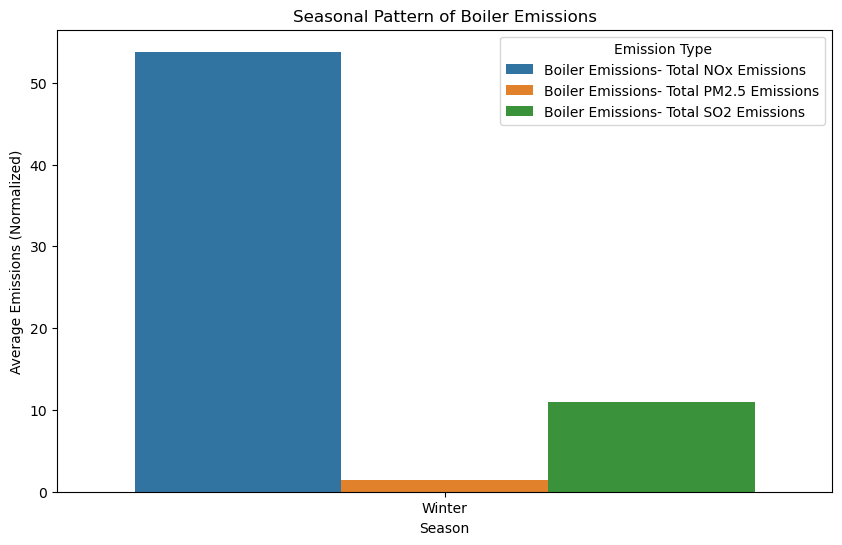

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Data Value', hue='Name', data=seasonal_emissions)

# Add titles and labels
plt.title('Seasonal Pattern of Boiler Emissions')
plt.xlabel('Season')
plt.ylabel('Average Emissions (Normalized)')
plt.legend(title='Emission Type')

# Show the plot
plt.show()

#  Is there a seasonal trend in Asthma-related emergency department visits and hospitalizations due to pollutants like PM2.5 and Ozone?

In [17]:
# Filter the data for asthma-related visits and hospitalizations
asthma_data = df[df['Name'].isin([
    'Asthma emergency department visits due to PM2.5',
    'Asthma hospitalizations due to Ozone',
    'Asthma emergency departments visits due to Ozone'
])]

# Display the first few rows of the filtered data
asthma_data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
187,131425,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,208.0,Canarsie - Flatlands,2009-2011,01/01/2009,81.7,NaN
188,131445,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,407.0,Southwest Queens,2009-2011,01/01/2009,80.0,NaN
189,131424,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,207.0,East Flatbush - Flatbush,2009-2011,01/01/2009,115.8,NaN
190,628472,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,408.0,Jamaica,2015-2017,01/01/2015,69.6,NaN
191,628471,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,407.0,Southwest Queens,2015-2017,01/01/2015,43.0,NaN


In [19]:
# Convert 'Start_Date' to datetime
asthma_data['Start_Date'] = pd.to_datetime(asthma_data['Start_Date'])

# Extract the month and define the season
asthma_data['Month'] = asthma_data['Start_Date'].dt.month

# Define the season based on the month
asthma_data['Season'] = asthma_data['Month'].apply(get_season)

# Display the first few rows to verify
asthma_data.head()



C:\Users\kirah\AppData\Local\Temp\ipykernel_9468\1025617494.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma_data['Start_Date'] = pd.to_datetime(asthma_data['Start_Date'])
C:\Users\kirah\AppData\Local\Temp\ipykernel_9468\1025617494.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma_data['Month'] = asthma_data['Start_Date'].dt.month
C:\Users\kirah\AppData\Local\Temp\ipykernel_9468\1025617494.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,Month,Season
187,131425,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,208.0,Canarsie - Flatlands,2009-2011,2009-01-01,81.7,NaN,1,Winter
188,131445,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,407.0,Southwest Queens,2009-2011,2009-01-01,80.0,NaN,1,Winter
189,131424,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,207.0,East Flatbush - Flatbush,2009-2011,2009-01-01,115.8,NaN,1,Winter
190,628472,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,408.0,Jamaica,2015-2017,2015-01-01,69.6,NaN,1,Winter
191,628471,648,Asthma emergency department visits due to PM2.5,Estimated annual rate (under age 18),"per 100,000 children",UHF42,407.0,Southwest Queens,2015-2017,2015-01-01,43.0,NaN,1,Winter


In [20]:
# Group the data by 'Season' and 'Name', and calculate the mean values
seasonal_asthma = asthma_data.groupby(['Season', 'Name'])['Data Value'].mean().reset_index()

# Display the results
seasonal_asthma

,Season,Name,Data Value
0,Winter,Asthma emergency department visits due to PM2.5,65.850417
1,Winter,Asthma emergency departments visits due to Ozone,71.978969
2,Winter,Asthma hospitalizations due to Ozone,12.237397


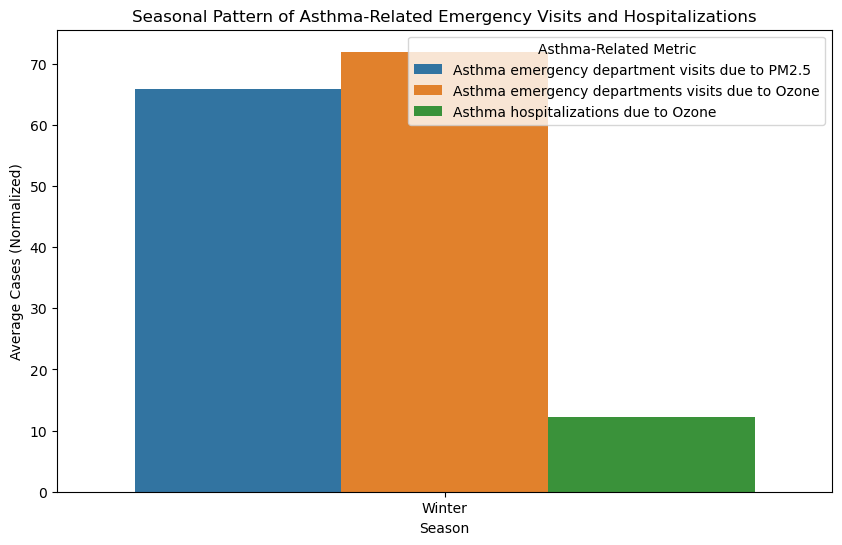

In [21]:

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Data Value', hue='Name', data=seasonal_asthma)

# Add titles and labels
plt.title('Seasonal Pattern of Asthma-Related Emergency Visits and Hospitalizations')
plt.xlabel('Season')
plt.ylabel('Average Cases (Normalized)')
plt.legend(title='Asthma-Related Metric')

# Show the plot
plt.show()

## Do Vehicle Miles Traveled (both total, trucks, and cars) show any seasonal pattern?

In [22]:
# Filter the data for Vehicle Miles Traveled
vmt_data = df[df['Name'].isin([
    'Annual vehicle miles traveled',
    'Annual vehicle miles traveled (trucks)',
    'Annual vehicle miles traveled (cars)'
])]

# Display the first few rows of the filtered data
vmt_data.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
568,816717,643,Annual vehicle miles traveled,Million miles,per square mile,CD,413.0,Queens Village (CD13),2010,01/01/2010,77.2,NaN
745,151637,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2005,01/01/2005,35.7,NaN
746,151647,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,307.0,Gramercy Park - Murray Hill,2005,01/01/2005,185.6,NaN
747,816762,643,Annual vehicle miles traveled,Million miles,per square mile,CD,303.0,Bedford Stuyvesant (CD3),2010,01/01/2010,55.9,NaN
748,154605,643,Annual vehicle miles traveled,Million miles,per square mile,CD,404.0,Elmhurst and Corona (CD4),2005,01/01/2005,78.0,NaN


In [23]:
# Convert 'Start_Date' to datetime
vmt_data['Start_Date'] = pd.to_datetime(vmt_data['Start_Date'])

# Extract the month and define the season
vmt_data['Month'] = vmt_data['Start_Date'].dt.month

# Define the season based on the month
vmt_data['Season'] = vmt_data['Month'].apply(get_season)

# Display the first few rows to verify
vmt_data.head()

C:\Users\kirah\AppData\Local\Temp\ipykernel_9468\1519346059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vmt_data['Start_Date'] = pd.to_datetime(vmt_data['Start_Date'])
C:\Users\kirah\AppData\Local\Temp\ipykernel_9468\1519346059.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vmt_data['Month'] = vmt_data['Start_Date'].dt.month
C:\Users\kirah\AppData\Local\Temp\ipykernel_9468\1519346059.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message,Month,Season
568,816717,643,Annual vehicle miles traveled,Million miles,per square mile,CD,413.0,Queens Village (CD13),2010,2010-01-01,77.2,NaN,1,Winter
745,151637,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,208.0,Canarsie - Flatlands,2005,2005-01-01,35.7,NaN,1,Winter
746,151647,643,Annual vehicle miles traveled,Million miles,per square mile,UHF42,307.0,Gramercy Park - Murray Hill,2005,2005-01-01,185.6,NaN,1,Winter
747,816762,643,Annual vehicle miles traveled,Million miles,per square mile,CD,303.0,Bedford Stuyvesant (CD3),2010,2010-01-01,55.9,NaN,1,Winter
748,154605,643,Annual vehicle miles traveled,Million miles,per square mile,CD,404.0,Elmhurst and Corona (CD4),2005,2005-01-01,78.0,NaN,1,Winter


In [25]:
# Group the data by 'Season' and 'Name', and calculate the mean values
seasonal_vmt = vmt_data.groupby(['Season', 'Name'])['Data Value'].mean().reset_index()

# Display the results
seasonal_vmt


,Season,Name,Data Value
0,Winter,Annual vehicle miles traveled,73.430218
1,Winter,Annual vehicle miles traveled (cars),67.773832
2,Winter,Annual vehicle miles traveled (trucks),3.887227


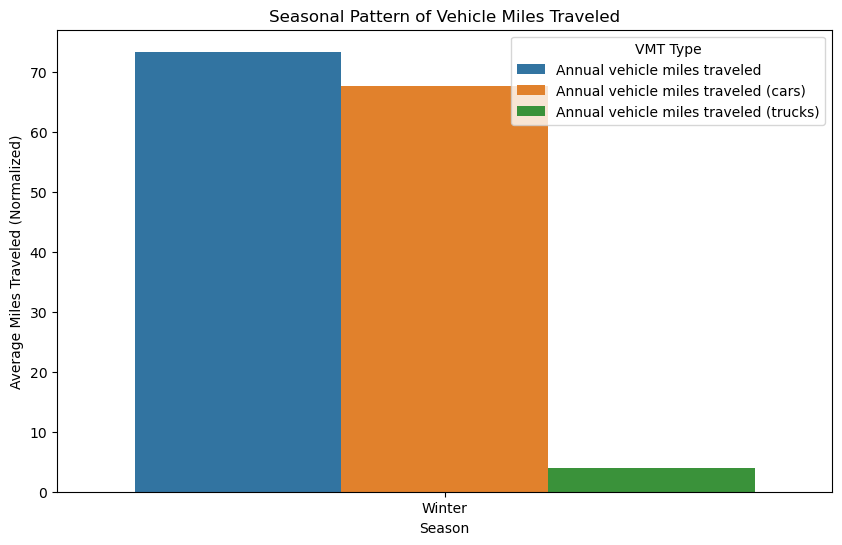

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='Data Value', hue='Name', data=seasonal_vmt)

# Add titles and labels
plt.title('Seasonal Pattern of Vehicle Miles Traveled')
plt.xlabel('Season')
plt.ylabel('Average Miles Traveled (Normalized)')
plt.legend(title='VMT Type')

# Show the plot
plt.show()